<a href="https://colab.research.google.com/github/wisdom99416/Prac_class/blob/main/%ED%86%B5%EA%B3%84%ED%95%99%ED%8A%B9%EA%B0%95HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 통계학특강 HW 1

- Practice dplyr function

- Visualizing

#### 1. Data Scanning

In [10]:
# install.packages("nycflights13")
library(nycflights13)

? flights

In [13]:
head(flights)

str(flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


tibble [336,776 × 19] (S3: tbl_df/tbl/data.frame)
 $ year          : int [1:336776] 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ day           : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ dep_time      : int [1:336776] 517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time: int [1:336776] 515 529 540 545 600 558 600 600 600 600 ...
 $ dep_delay     : num [1:336776] 2 4 2 -1 -6 -4 -5 -3 -3 -2 ...
 $ arr_time      : int [1:336776] 830 850 923 1004 812 740 913 709 838 753 ...
 $ sched_arr_time: int [1:336776] 819 830 850 1022 837 728 854 723 846 745 ...
 $ arr_delay     : num [1:336776] 11 20 33 -18 -25 12 19 -14 -8 8 ...
 $ carrier       : chr [1:336776] "UA" "UA" "AA" "B6" ...
 $ flight        : int [1:336776] 1545 1714 1141 725 461 1696 507 5708 79 301 ...
 $ tailnum       : chr [1:336776] "N14228" "N24211" "N619AA" "N804JB" ...
 $ origin        : chr [1:336776] "EWR" "LGA" "JFK" "JFK" ...
 $ dest          : ch

In [15]:
colnames(flights)
summary(flights)

[1] "year"           "month"          "day"            "dep_time"      
 [5] "sched_dep_time" "dep_delay"      "arr_time"       "sched_arr_time"
 [9] "arr_delay"      "carrier"        "flight"         "tailnum"       
[13] "origin"         "dest"           "air_time"       "distance"      
[17] "hour"           "minute"         "time_hour"

      year          month             day           dep_time    sched_dep_time
 Min.   :2013   Min.   : 1.000   Min.   : 1.00   Min.   :   1   Min.   : 106  
 1st Qu.:2013   1st Qu.: 4.000   1st Qu.: 8.00   1st Qu.: 907   1st Qu.: 906  
 Median :2013   Median : 7.000   Median :16.00   Median :1401   Median :1359  
 Mean   :2013   Mean   : 6.549   Mean   :15.71   Mean   :1349   Mean   :1344  
 3rd Qu.:2013   3rd Qu.:10.000   3rd Qu.:23.00   3rd Qu.:1744   3rd Qu.:1729  
 Max.   :2013   Max.   :12.000   Max.   :31.00   Max.   :2400   Max.   :2359  
                                                 NA's   :8255                 
   dep_delay          arr_time    sched_arr_time   arr_delay       
 Min.   : -43.00   Min.   :   1   Min.   :   1   Min.   : -86.000  
 1st Qu.:  -5.00   1st Qu.:1104   1st Qu.:1124   1st Qu.: -17.000  
 Median :  -2.00   Median :1535   Median :1556   Median :  -5.000  
 Mean   :  12.64   Mean   :1502   Mean   :1536   Mean   :   6.895  
 3rd Qu.:  11.00   3rd Qu.:1

In [20]:
# Missing Values
summary(is.na(flights))

    year           month            day           dep_time      
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:336776    FALSE:336776    FALSE:336776    FALSE:328521   
                                                 TRUE :8255     
 sched_dep_time  dep_delay        arr_time       sched_arr_time 
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:336776    FALSE:328521    FALSE:328063    FALSE:336776   
                 TRUE :8255      TRUE :8713                     
 arr_delay        carrier          flight         tailnum       
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:327346    FALSE:336776    FALSE:336776    FALSE:334264   
 TRUE :9430                                      TRUE :2512     
   origin           dest          air_time        distance      
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:336776    FALSE:336776    FALSE:327346    FALSE:336776   
                         

#### 2. Preprocessing

In [22]:
# 범주화
library(dplyr)
data <- flights

data$origin <- as.factor(data$origin)
data$dest <- as.factor(data$dest)
data$carrier <- as.factor(data$carrier)
data$tailnum <- as.factor(data$tailnum)
data$month <- as.factor(data$month)

str(data)

tibble [336,776 × 19] (S3: tbl_df/tbl/data.frame)
 $ year          : int [1:336776] 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : Factor w/ 12 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ day           : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ dep_time      : int [1:336776] 517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time: int [1:336776] 515 529 540 545 600 558 600 600 600 600 ...
 $ dep_delay     : num [1:336776] 2 4 2 -1 -6 -4 -5 -3 -3 -2 ...
 $ arr_time      : int [1:336776] 830 850 923 1004 812 740 913 709 838 753 ...
 $ sched_arr_time: int [1:336776] 819 830 850 1022 837 728 854 723 846 745 ...
 $ arr_delay     : num [1:336776] 11 20 33 -18 -25 12 19 -14 -8 8 ...
 $ carrier       : Factor w/ 16 levels "9E","AA","AS",..: 12 12 2 4 5 12 4 6 4 2 ...
 $ flight        : int [1:336776] 1545 1714 1141 725 461 1696 507 5708 79 301 ...
 $ tailnum       : Factor w/ 4043 levels "D942DN","N0EGMQ",..: 180 524 2401 3204 2661 1142 1829 3300 2207

In [24]:
# Does dep_delay = NA means 0?

count(data %>% 
  filter(dep_delay == 0))

n
<int>
16514


출발 딜레이 값에 0이 다수 존재하기에 결측치는 딜레이 되지 않았다는 것을 의미하는 것이 아닌 단순 결측이라고 생각할 수 있다. --> 제거하고 평균 구하겠다!

#### 3. Analysis and visualization(1)

In [47]:
# origin과 month에 따라 dep_delay와 arr_delay 차이 비교 origin에 따라 dep_delay와 arr_delay 차이 비교
library(ggplot2)

data %>% 
  select(dep_delay, arr_delay, origin, dest, distance) %>% 
  group_by(origin, dest) %>%
  mutate(diff = dep_delay - arr_delay) %>% 
  summarise(mean_diff = mean(diff, na.rm = T), mean_dis = mean(distance))%>% 
  arrange(desc(mean_diff)) -> df_diff

head(df_diff)


`summarise()` has grouped output by 'origin'. You can override using the `.groups` argument.



origin,dest,mean_diff,mean_dis
<fct>,<fct>,<dbl>,<dbl>
JFK,STL,28.00000,892
JFK,BHM,26.00000,865
JFK,MEM,19.00000,964
LGA,SBN,16.83333,651
JFK,MCI,16.82283,1113
JFK,SAT,16.63988,1587


Warning message:
“Removed 1 rows containing missing values (geom_point).”


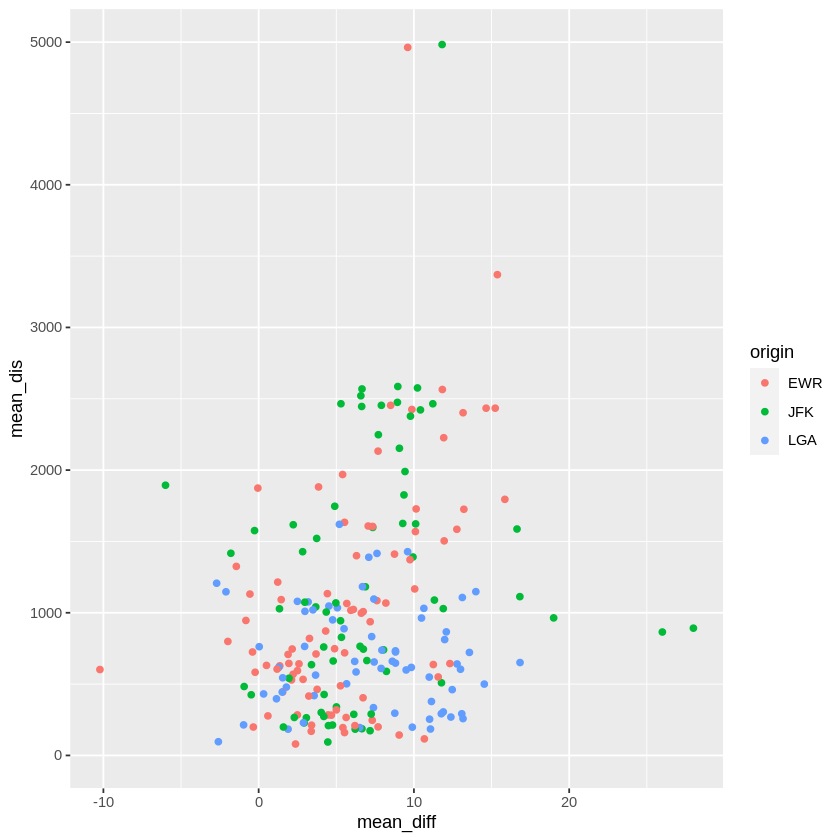

In [48]:
# 시각화

ggplot(df_diff) +
  aes(mean_diff, mean_dis, color = origin) +
    geom_point()

상대적으로 파란점들이 아래에 포진되어있다고 볼 수 있다.

`summarise()` has grouped output by 'origin'. You can override using the `.groups` argument.



origin,dest,mean_dd,mean_ad,diff
<fct>,<fct>,<dbl>,<dbl>,<dbl>
JFK,STL,20.000000,-8.000000,28.00000
JFK,BHM,7.000000,-19.000000,26.00000
JFK,MEM,14.000000,-5.000000,19.00000
JFK,MCI,23.085938,5.795276,17.29066
JFK,SAT,23.413598,6.229167,17.18443
LGA,SBN,31.333333,14.500000,16.83333
EWR,MTJ,17.642857,1.785714,15.85714
EWR,SNA,7.761905,-7.868227,15.63013
EWR,PDX,16.567901,1.106572,15.46133


#### 4. Analysis and visualization(2)

In [40]:
data %>% 
  select(month, air_time, arr_delay, dest) %>% 
  group_by(month, dest) %>% 
  summarise(mean_at = mean(air_time, na.rm = T), mean_ad = mean(arr_delay, na.rm = T ))-> df_month

  head(df_month, 10)

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.



month,dest,mean_at,mean_ad
<fct>,<fct>,<dbl>,<dbl>
1,ALB,32.61905,35.174603
1,ATL,121.26316,4.152047
1,AUS,232.90533,8.715976
1,AVL,102.50000,23.500000
1,BDL,24.78378,10.972973
1,BHM,132.65217,16.695652
1,BNA,126.30491,12.702842
1,BOS,39.04530,-2.537891
1,BQN,192.93548,2.645161


Warning message:
“Removed 1 rows containing missing values (geom_point).”


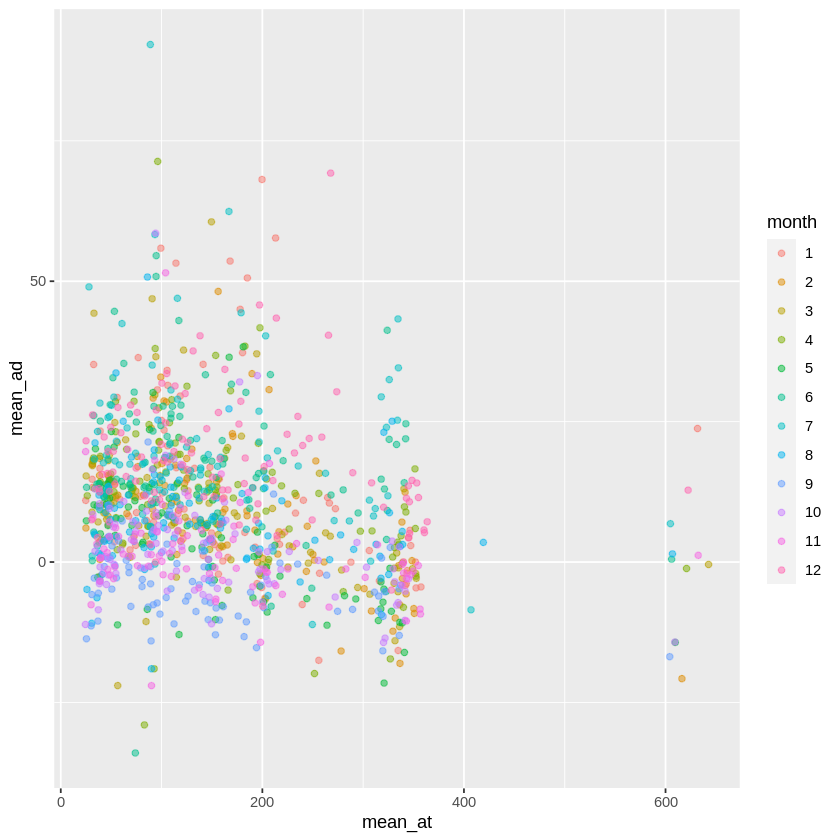

In [41]:
# 시각화

ggplot(df_month) +
  aes(mean_at, mean_ad, color = month, na.rm = T) +
  geom_point(alpha=0.5)


달을 나타낸 색의 분포가 고르지 않다고 볼 수 있다.